In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\Users\thaku\AppData\Local\Temp\ipykernel_12772\1964672122.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [3]:
dataset= pd.read_csv('TSLA.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
1054,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
1055,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500
1056,2024-03-14,167.770004,171.169998,160.509995,162.500000,162.500000,126325700
1057,2024-03-15,163.160004,165.179993,160.759995,163.570007,163.570007,96971900


In [4]:
# type(dataset['Date'][0]) 
dataset.info()  #need to convert date into the date time object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1059 non-null   object 
 1   Open       1059 non-null   float64
 2   High       1059 non-null   float64
 3   Low        1059 non-null   float64
 4   Close      1059 non-null   float64
 5   Adj Close  1059 non-null   float64
 6   Volume     1059 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 58.0+ KB


In [5]:

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
dataset['Date'] = dataset['Date'].apply(str_to_datetime)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1059 non-null   datetime64[ns]
 1   Open       1059 non-null   float64       
 2   High       1059 non-null   float64       
 3   Low        1059 non-null   float64       
 4   Close      1059 non-null   float64       
 5   Adj Close  1059 non-null   float64       
 6   Volume     1059 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 58.0 KB


In [8]:
dataset.index = dataset.pop('Date')
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500
2024-03-14,167.770004,171.169998,160.509995,162.500000,162.500000,126325700


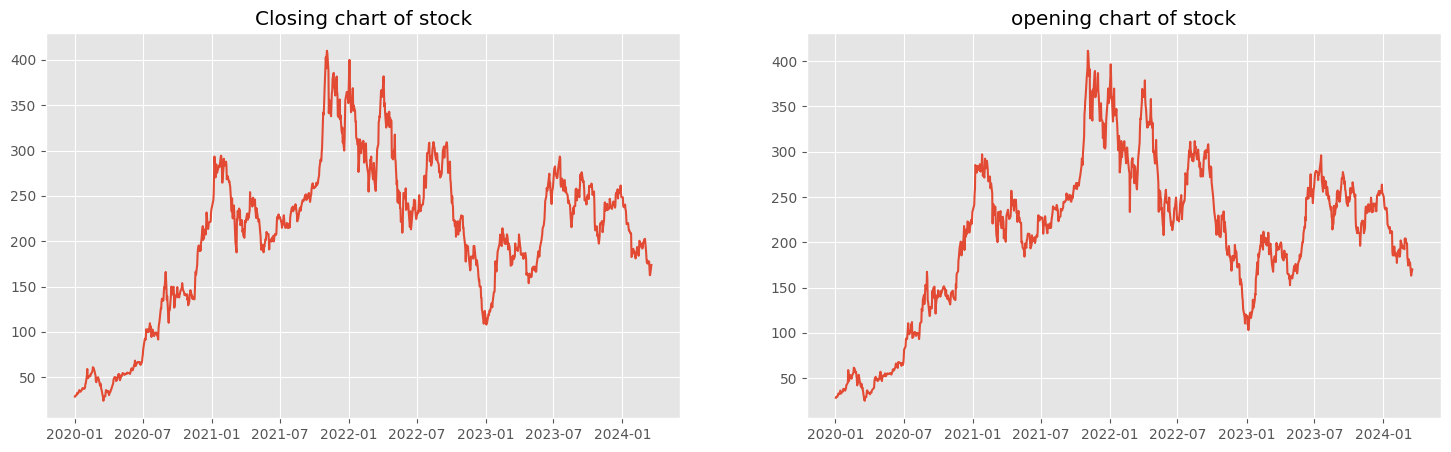

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(dataset.index, dataset['Close'])
plt.title("Closing chart of stock")

plt.subplot(1,2,2)
plt.plot(dataset.index, dataset['Open'])
plt.title("opening chart of stock")

plt.show()

In [10]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500
2024-03-14,167.770004,171.169998,160.509995,162.500000,162.500000,126325700


In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(dataset, '2021-01-02', '2024-03-18', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-01-02,221.229996,221.996674,231.593338,235.223328
1,2021-01-05,231.593338,235.223328,243.256668,245.036667
2,2021-01-06,235.223328,243.256668,245.036667,251.993332
3,2021-01-07,243.256668,245.036667,251.993332,272.013336
4,2021-01-08,245.036667,251.993332,272.013336,293.339996
...,...,...,...,...,...
801,2024-03-12,178.649994,175.339996,177.770004,177.539993
802,2024-03-13,175.339996,177.770004,177.539993,169.479996
803,2024-03-14,177.770004,177.539993,169.479996,162.500000
804,2024-03-15,177.539993,169.479996,162.500000,163.570007


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((806,), (806, 3, 1), (806,))

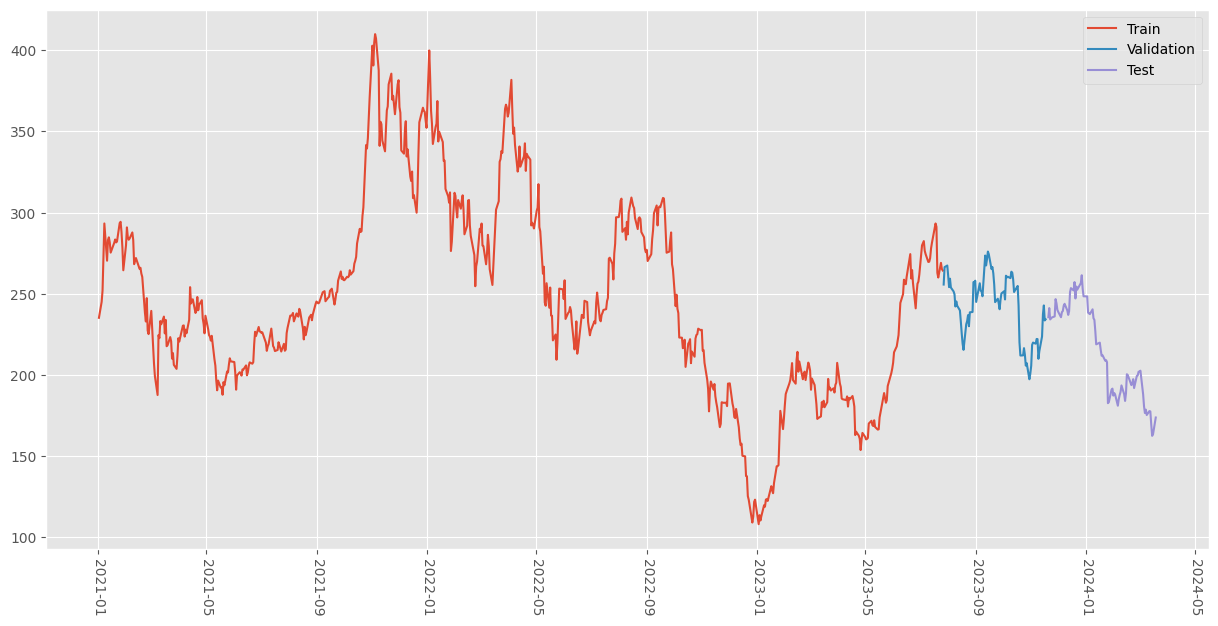

In [57]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]


plt.figure(figsize=(15,7))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

plt.xticks(rotation = -90)
plt.show()

In [58]:

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),metrics=['mse'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
21/21 [==============================] - 6s 76ms/step - loss: 64371.7148 - mse: 64371.7148 - val_loss: 57863.6719 - val_mse: 57863.6719
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 62778.4844 - mse: 62778.4844 - val_loss: 55727.4141 - val_mse: 55727.4141
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 59743.9258 - mse: 59743.9258 - val_loss: 51414.0117 - val_mse: 51414.0117
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 53876.1367 - mse: 53876.1367 - val_loss: 44046.4023 - val_mse: 44046.4023
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 43603.3711 - mse: 43603.3711 - val_loss: 30471.6133 - val_mse: 30471.6133
Epoch 6/100
21/21 [==============================] - 0s 9ms/step - loss: 27770.9121 - mse: 27770.9121 - val_loss: 14083.2578 - val_mse: 14083.2578
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 11684.5713 - mse: 11684.5713 - val_loss:

21/21 [==============================] - 1s 4ms/step


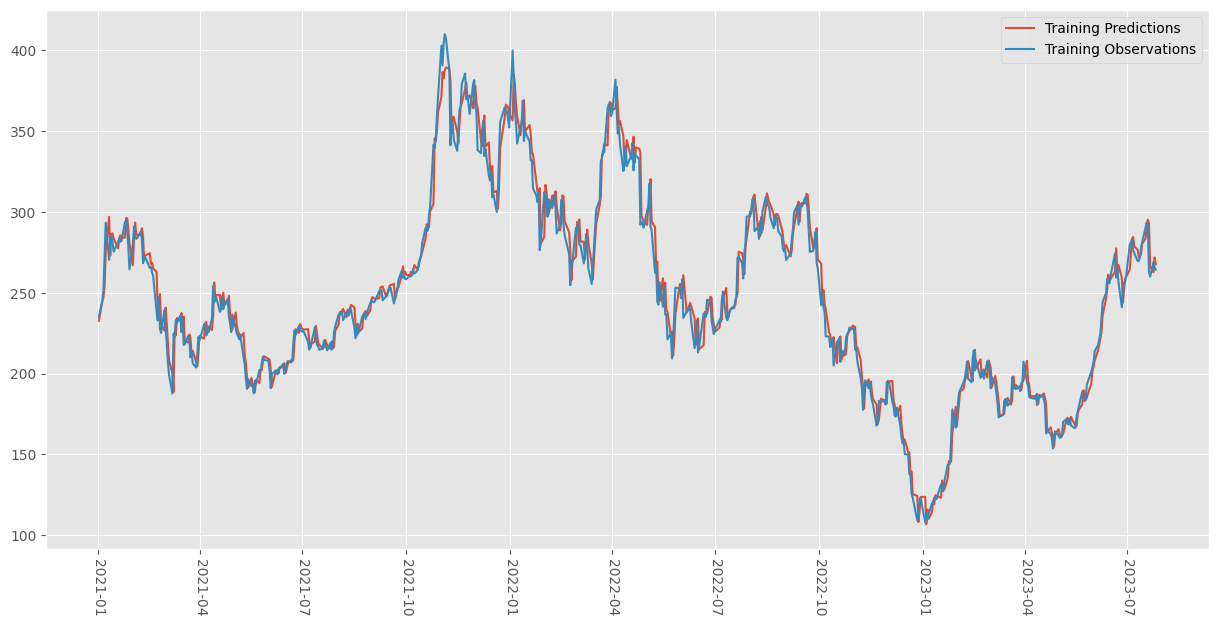

In [59]:
plt.figure(figsize=(15,7))
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.xticks(rotation = -90)
plt.show()

3/3 [==============================] - 0s 5ms/step


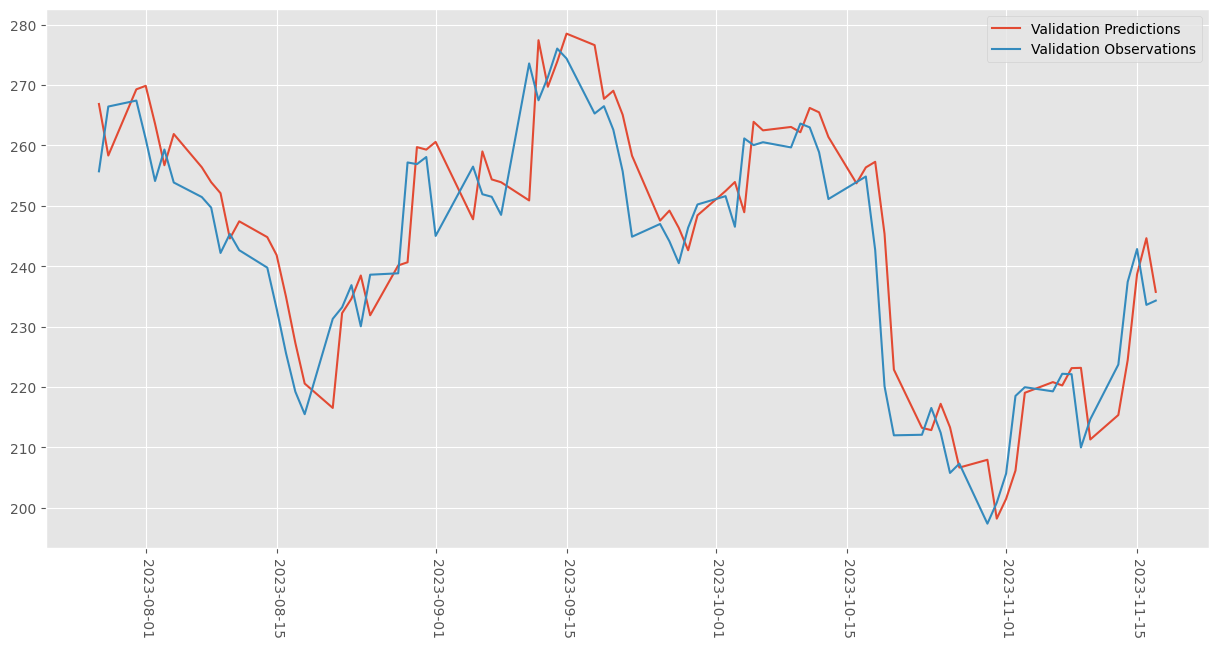

In [60]:
plt.figure(figsize=(15,7))
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.xticks(rotation = -90)
plt.show()

3/3 [==============================] - 0s 8ms/step


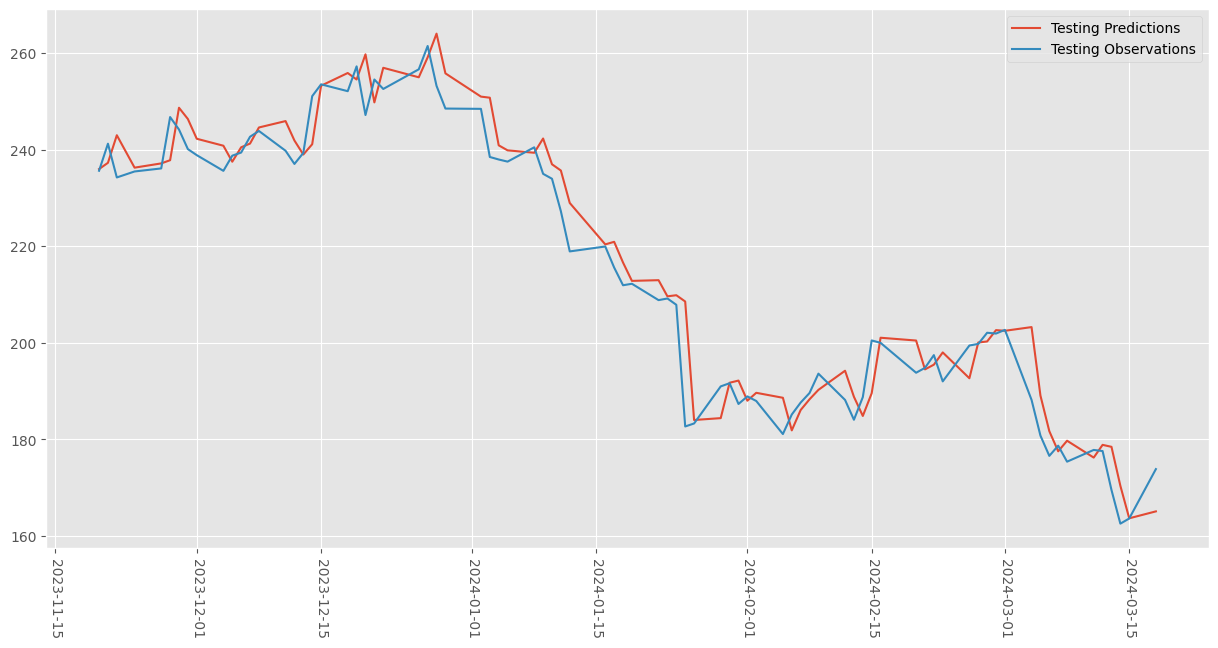

In [61]:
plt.figure(figsize=(15,7))
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.xticks(rotation = -90)
plt.show()

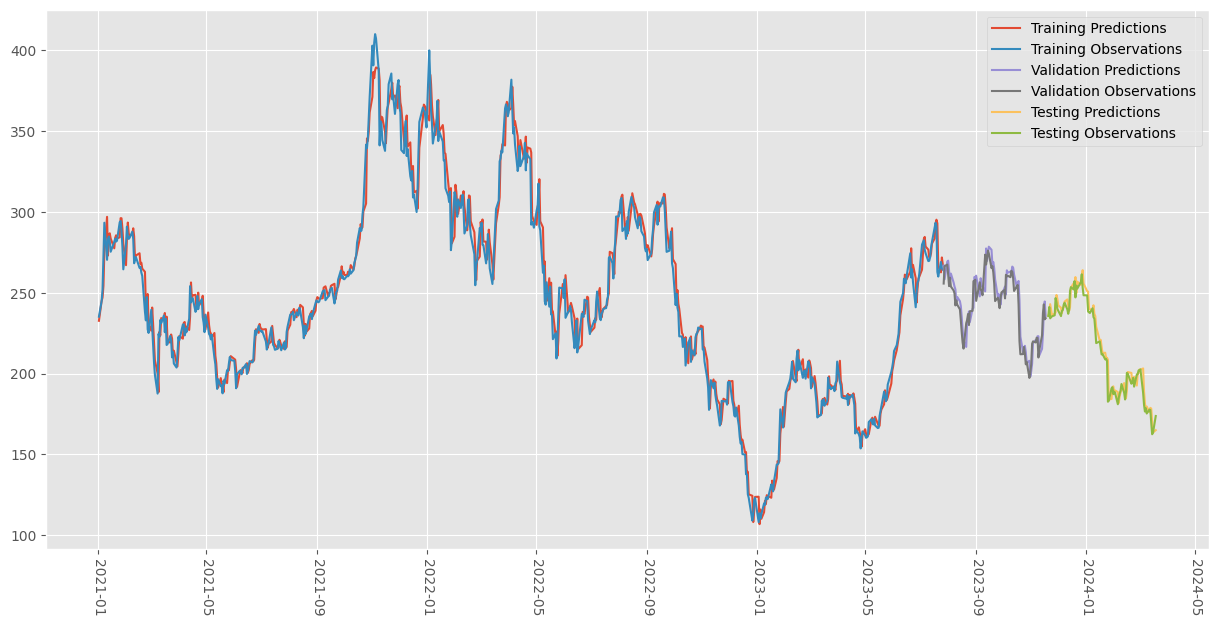

In [62]:
plt.figure(figsize=(15,7))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

plt.xticks(rotation = -90)
plt.show()